#### Name: Toluwalope TEMENU
#### Student ID: 2566894
#### Task 1: Machine Learning Using Regression Model

#### Data Information

Our dataset contains 18 features with one target variable(price).
The goal of this task is to build a model that predicts the prices of houses based on these variables. 

**Key Notes:**
1. Data contains no null values <br>
2. Our data also contained duplicates values which were dropped <br>

In [1]:
# Data manipulation libiaries
import numpy as np
import pandas as pd

# Data visualization libaries
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing

In [2]:
# importing dataset
df = pd.read_csv('Concepts of AI Assessment/Regression/houseprice_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [3]:
# checking for duplicates
df.duplicated().sum()

5

In [4]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
547,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
3950,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14982,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
19636,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352
20053,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


In [5]:
# drop duplicates
df = df.drop_duplicates()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### Summary Statistics and Handling Outliers

In [6]:
# Summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Key insight from the summary statistics**
1. There is an entry whereby a house has 33 bedrooms. On inspection This is likely a data input error as houses with a sqft living of 1620 will likely have between 2-4 bedrooms. Similar archetehural designs also shows 3 bedrooms for this square footage as such the bedroom entry 33 will be changed to 3 <br>

**Link**: https://www.architecturaldesigns.com/house-plans/modern-duplex-house-plan-with-1620-square-foot-3-bed-units-100302ghr?srsltid=AfmBOoqm4kgIjHknmtHjb2POy_6Q0GBsdfrp0027EKQV4HIv1EiXCub

2. Other outliers also exist in the dataset and this will be handled using the winsorize function. Price column will also be log transformed.
3. Outliers are prone to affect linear regression model as such will be handled.

In [7]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [8]:
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3 # replacing 33 with 3

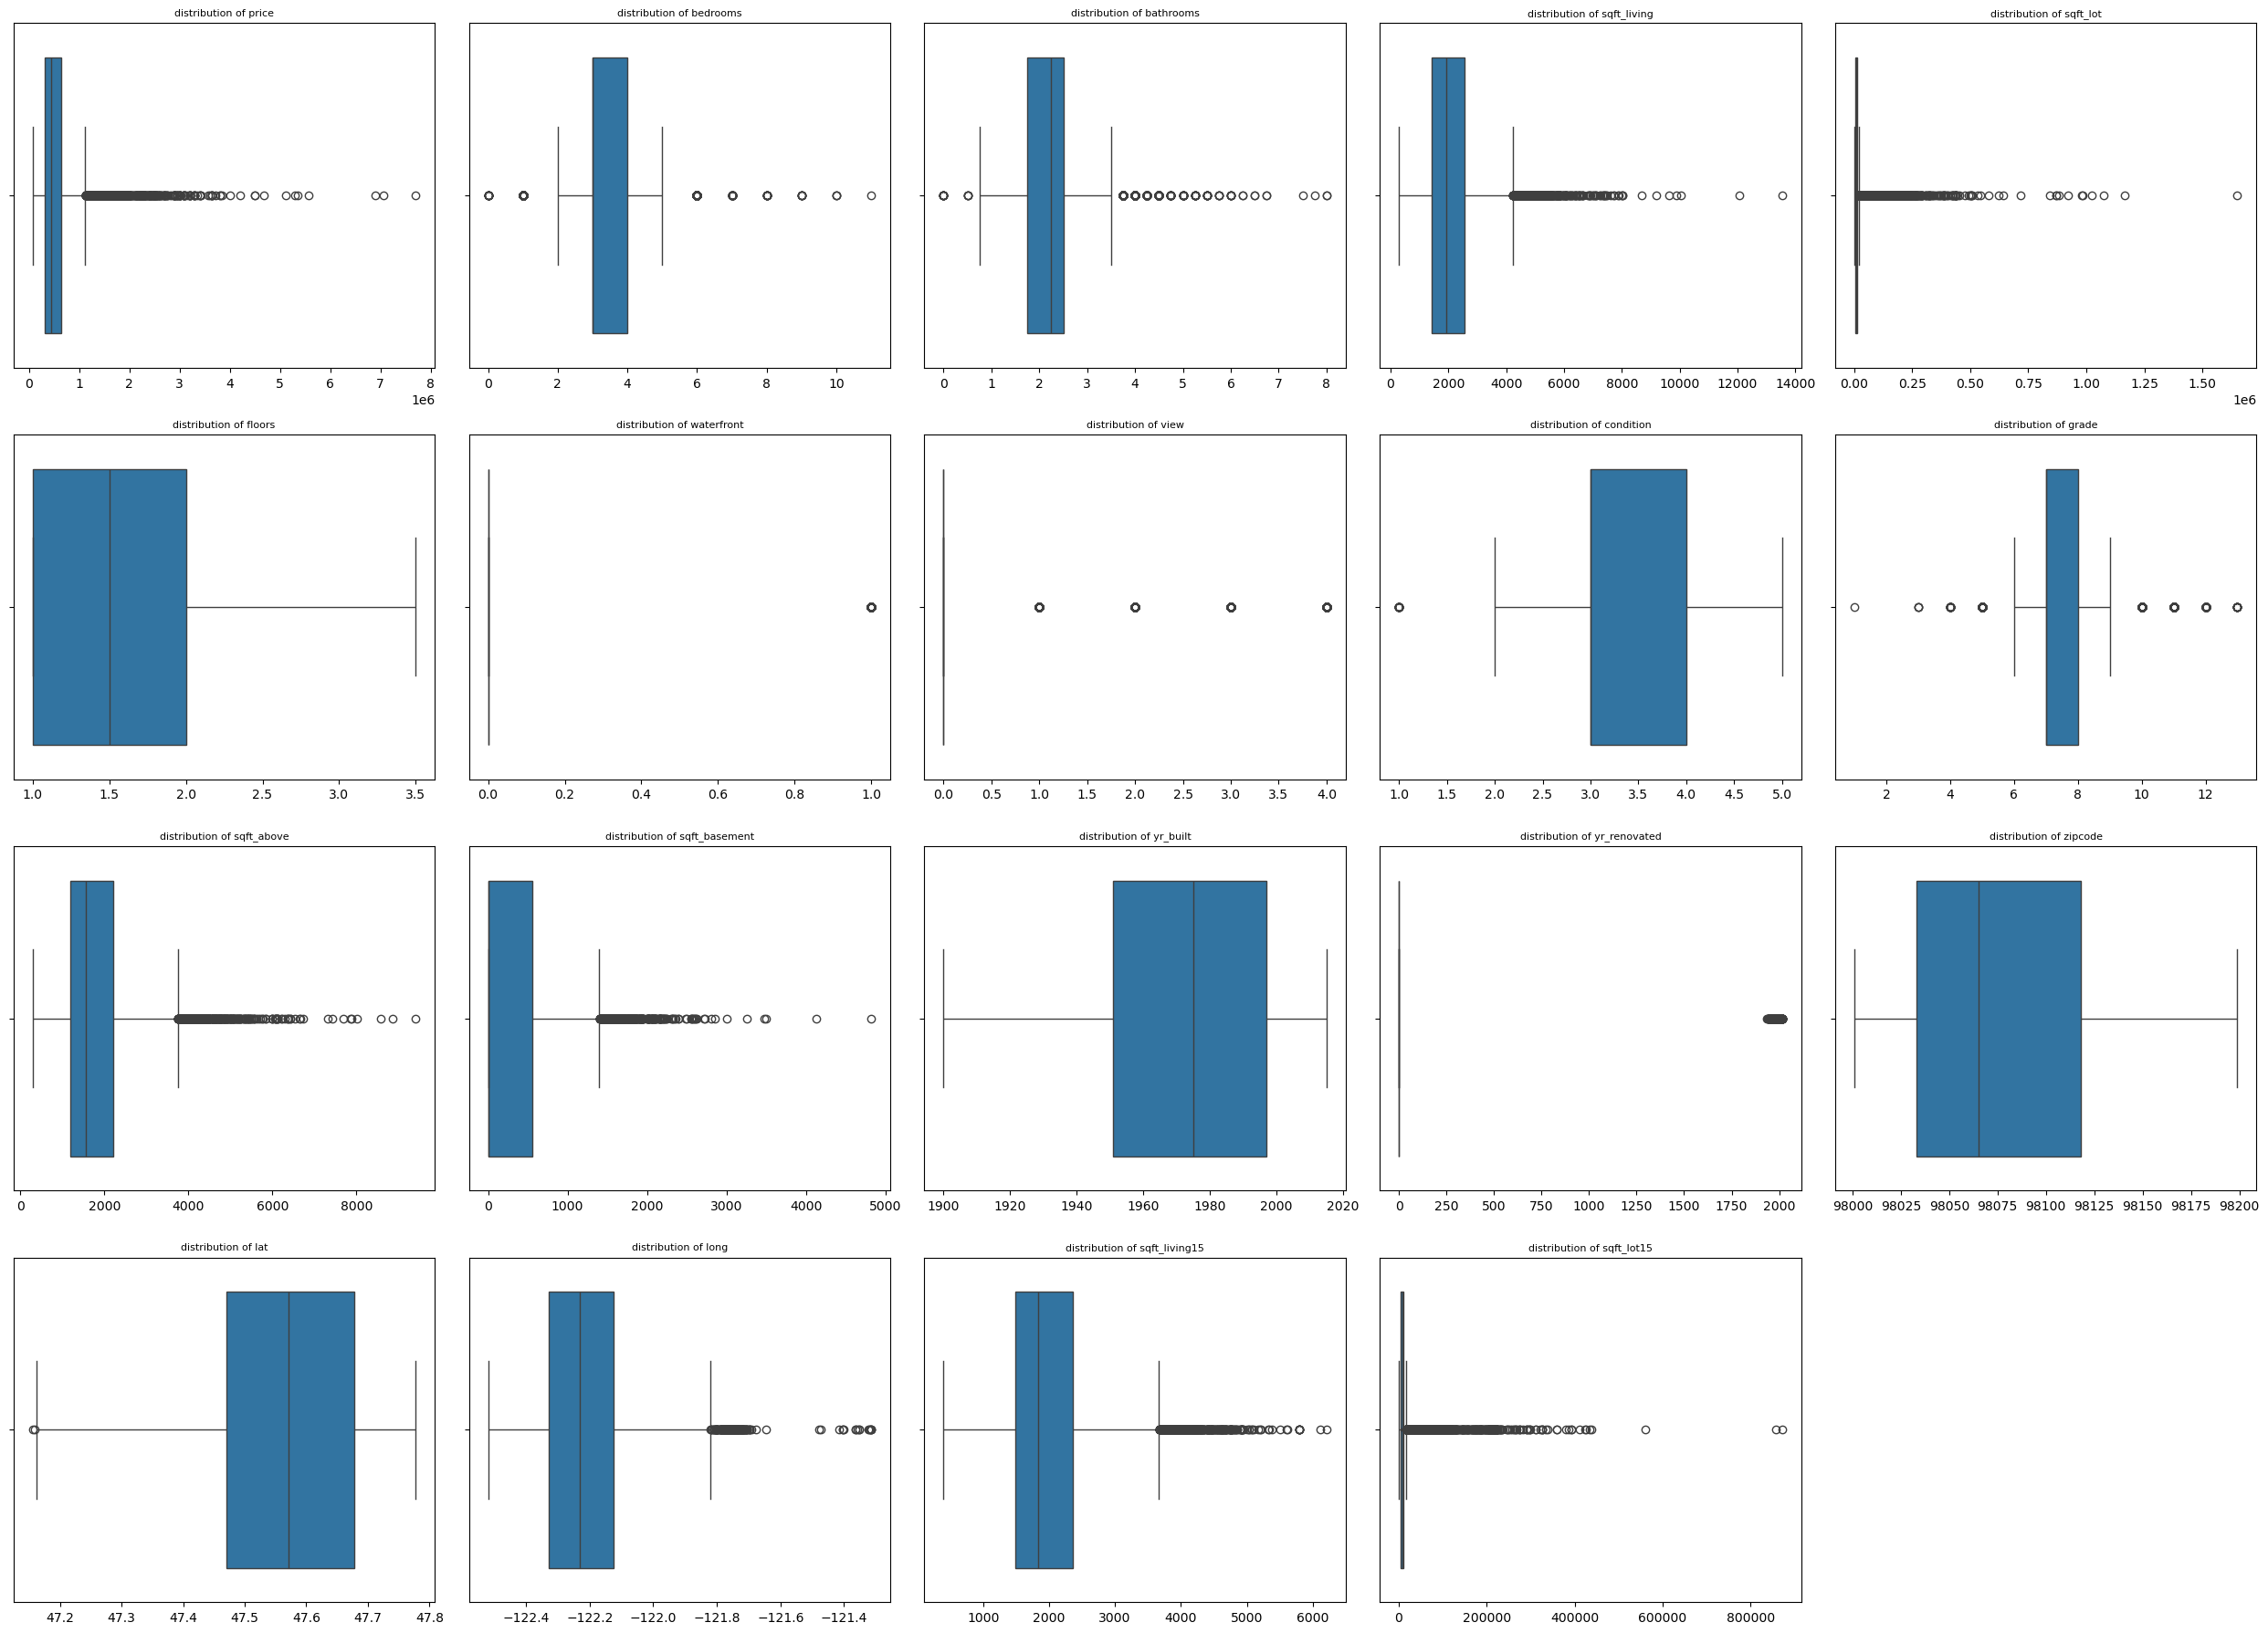

In [9]:
#Visualizing Outliers in our Dataset
#calculating grid size
variables = [col for col in df.columns]

num_variables = len(variables)
cols = 5 
rows = (num_variables + cols -1) // cols

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (5* cols, 4.5 * rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x= df[col], ax=axes[i])
    axes[i].set_title(f"distribution of {col}", fontsize = 8)
    axes[i].set_xlabel("")

for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.show()

Using Log Transformation: When analyzing data using linear regression, we often assume a linear relationship between the independent and dependent variables. However, real-world data doesn’t always behave that way. In many cases, the dependent variable may have a skewed distribution or show non-linear patterns, which can violate regression assumptions like normality and homoscedasticity (Code academy)

Link: https://www.codecademy.com/article/log-transformation-in-linear-regression-when-and-how-to-use-it

In [10]:
# Handling outliers for price using log transformation
df['price'] = np.log1p(df['price'])

In [11]:
from scipy.stats.mstats import winsorize
for col in ["bedrooms", "sqft_living", "sqft_lot", "sqft_above","sqft_basement","sqft_lot15"]:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

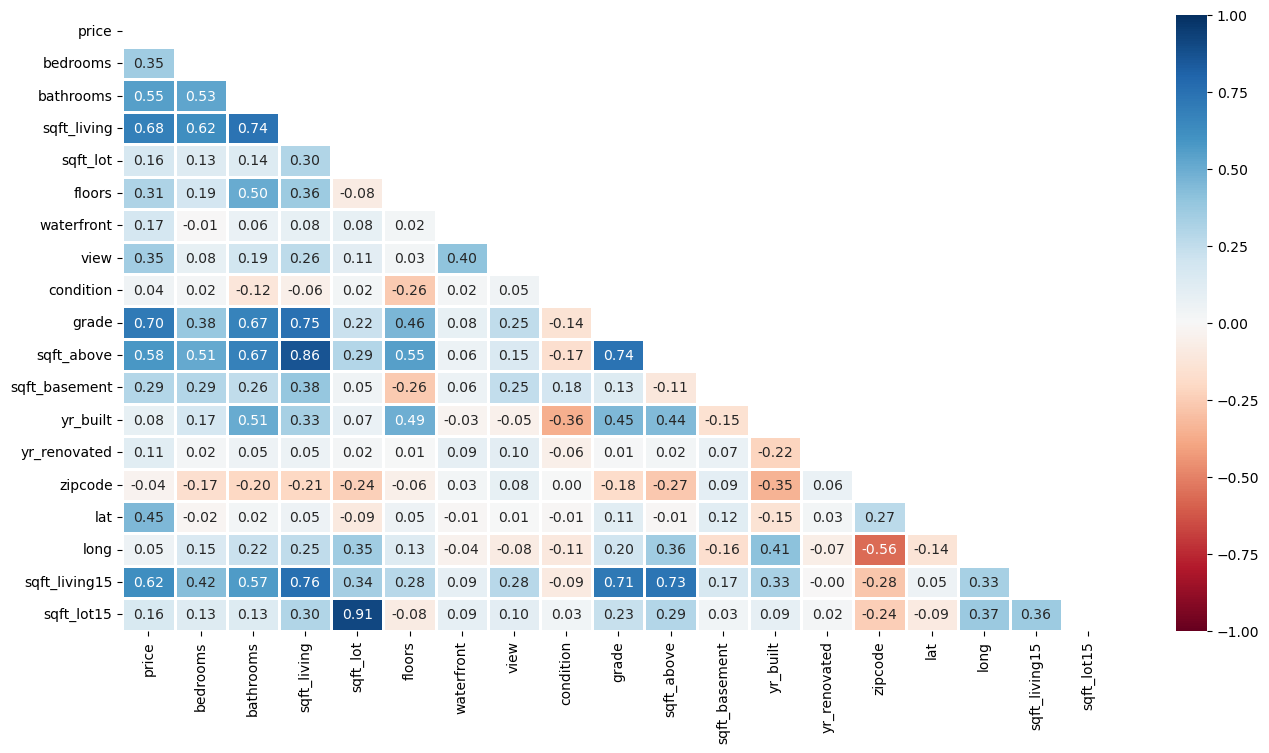

In [12]:
# Correlation of numeric values
import seaborn as sns
numeric_df = df.select_dtypes(include = 'number')
plt.figure(figsize =(16, 8))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
sns.heatmap(numeric_df.corr(), mask = mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

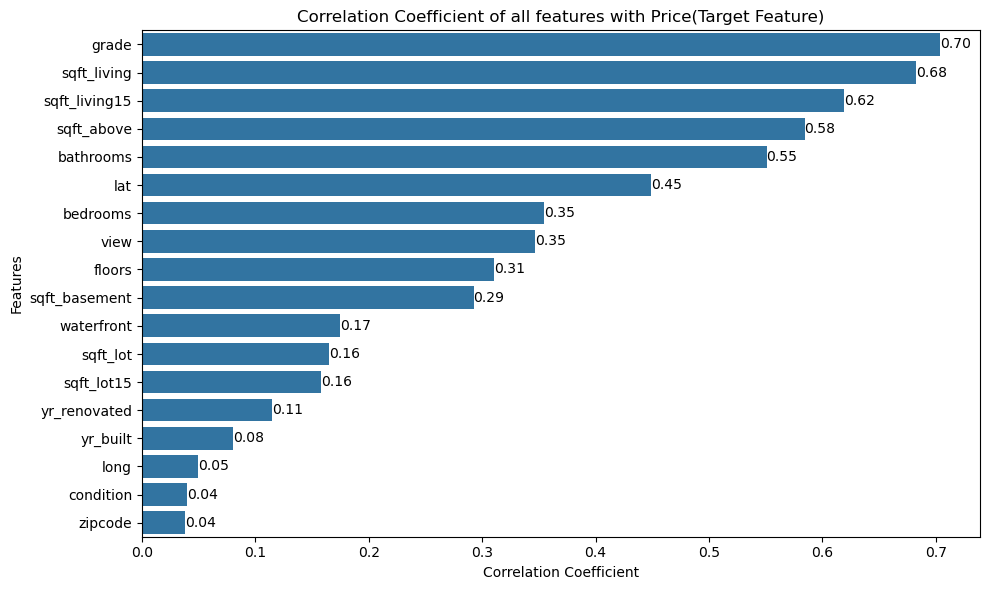

In [13]:
# Visualising correlation with Price
corr = numeric_df.corr()['price'].drop('price')
corr_sort = corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sort.values, y=corr_sort.index)
for index, values in enumerate(corr_sort):
    plt.text(values, index, f"{values:.2f}", va='center')

plt.title("Correlation Coefficient of all features with Price(Target Feature)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**From Correlation**
From our correlation coefficient output, the top 5 features highly correlated with Price: <br>
1. House grade
2. Square Footage living
3. Square footage above
4. Square footage living 15
5. Number of Bathrooms

**However** some features are highly correlated with one anotherI will drop one of these features later on in my modelling

**Link**: https://www.geeksforgeeks.org/machine-learning/multicollinearity-in-regression-analysis/

In [14]:
df = df.drop(['zipcode', 'sqft_lot15', 'sqft_living15', 'sqft_above'], axis=1)

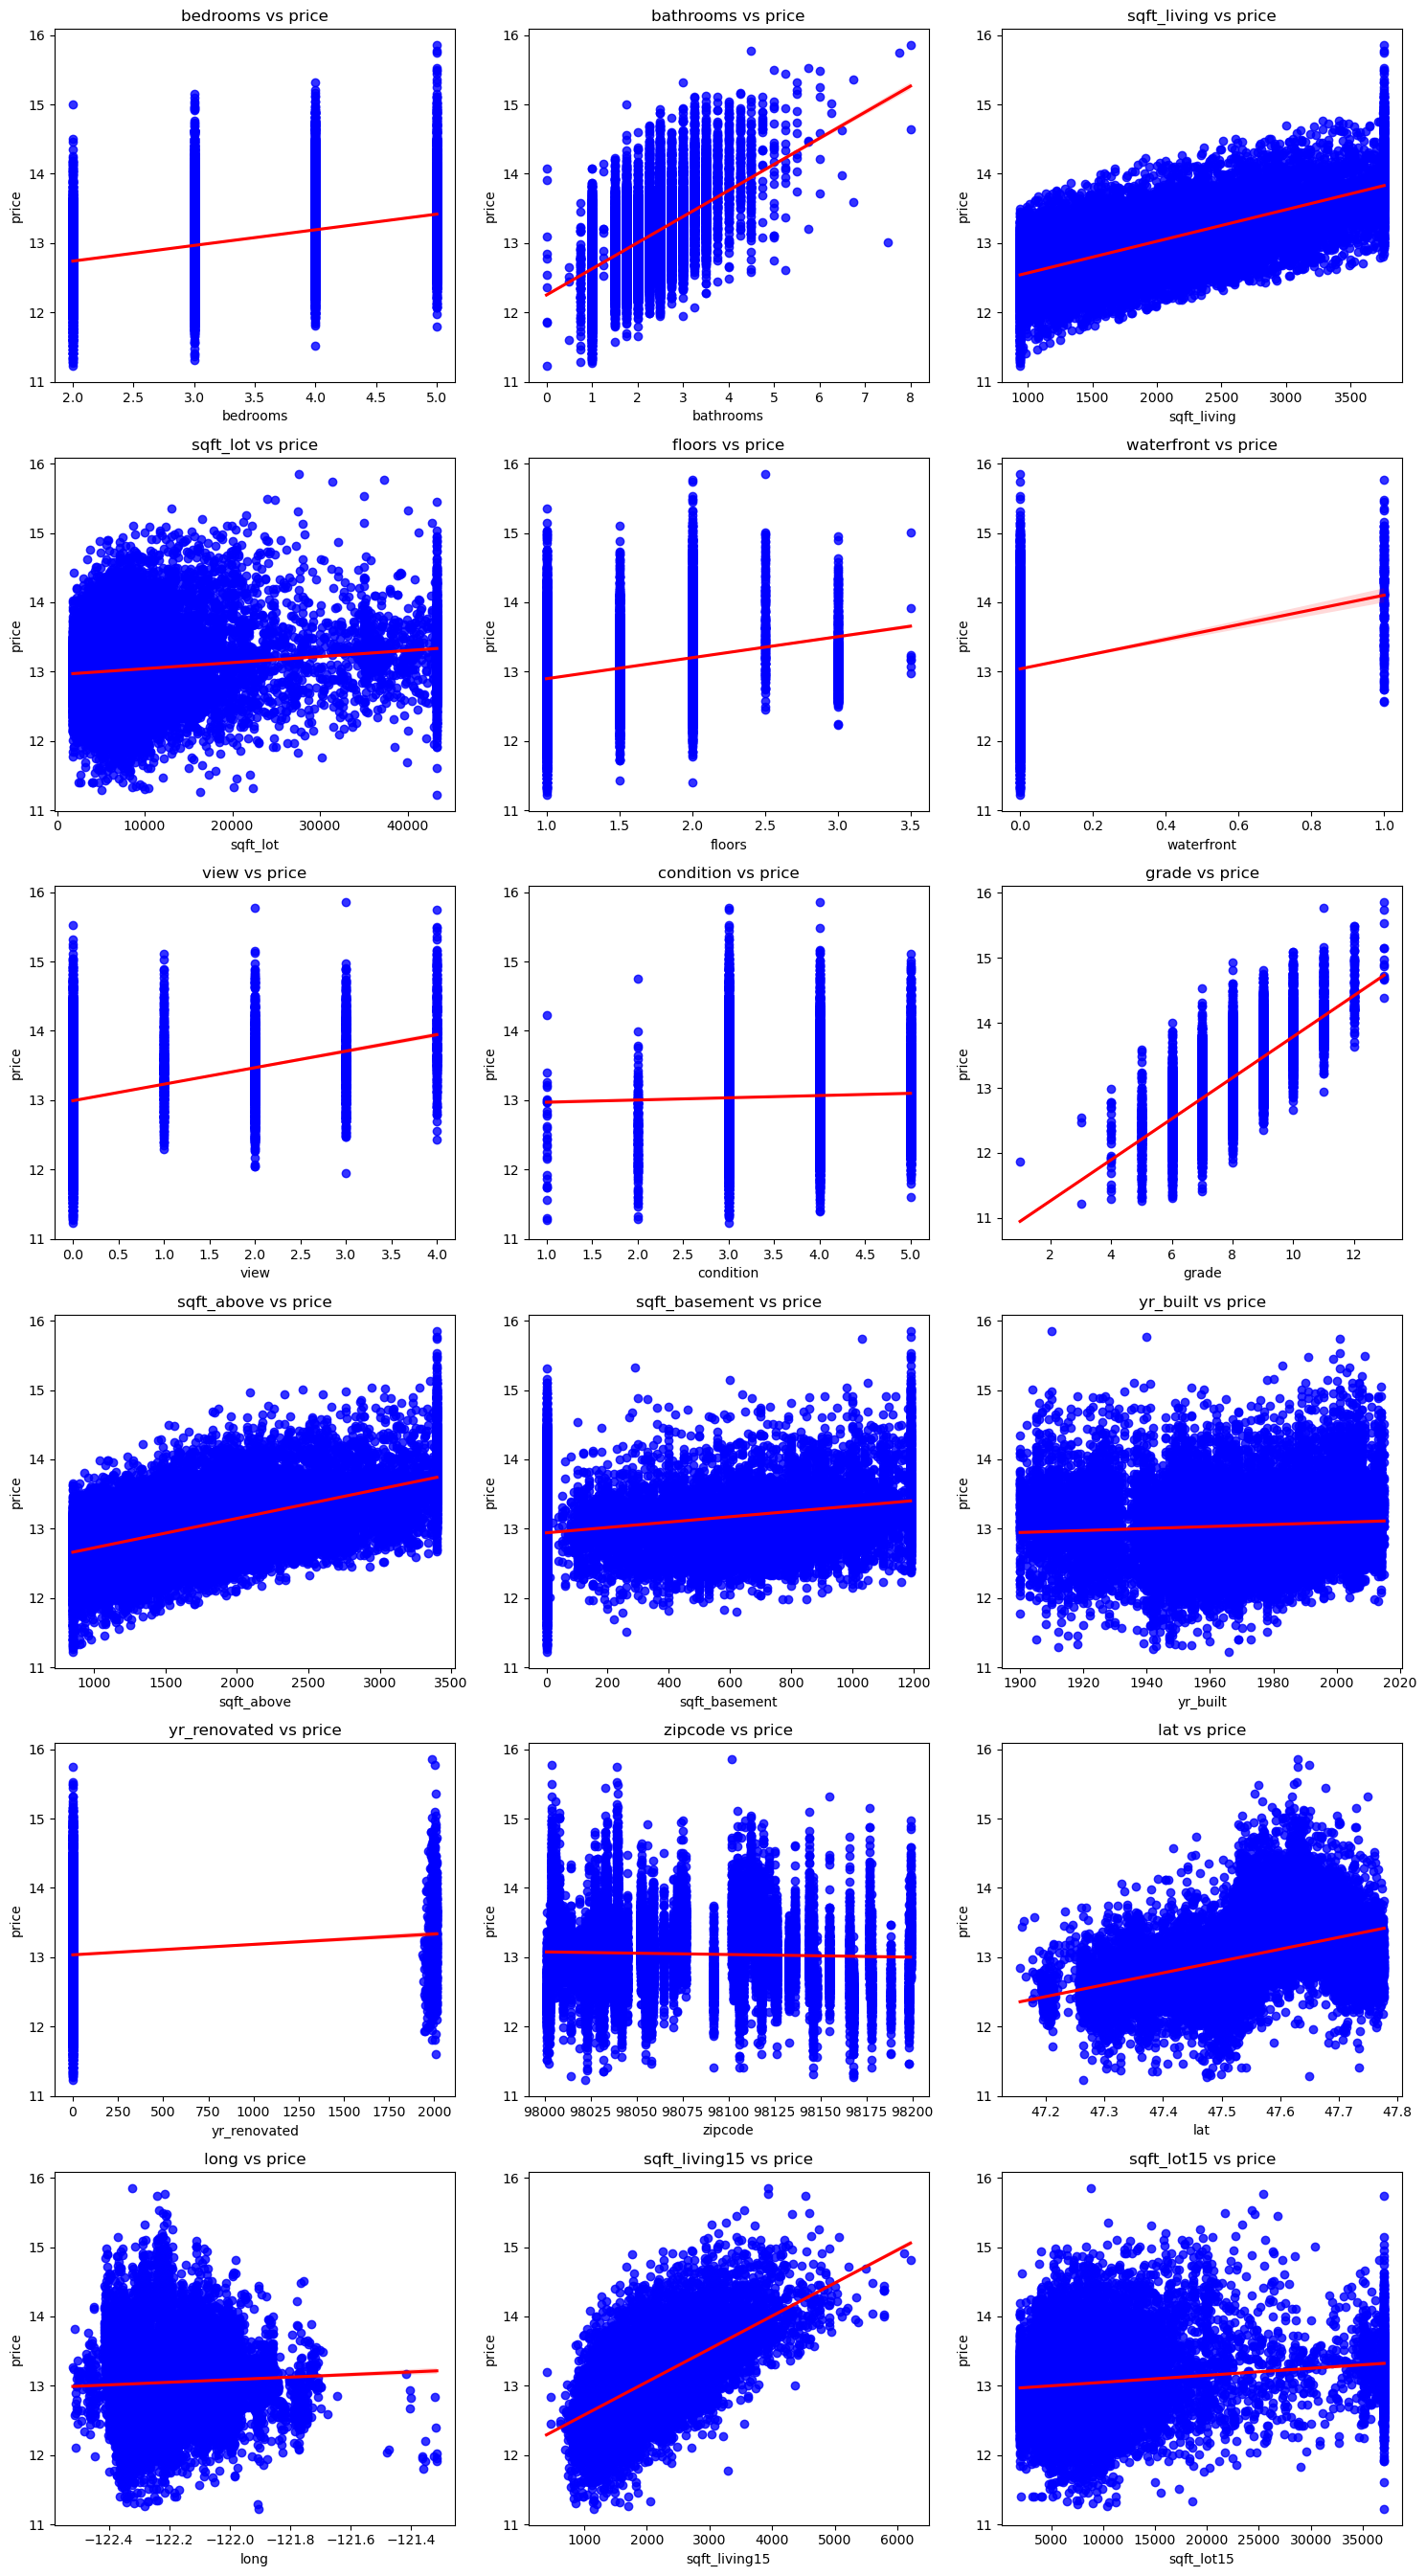

In [15]:
# Exploring relationships betwwen independent and dependent variables
target = 'price'
variables = [col for col in numeric_df.columns if col != target]

#Calculating grid size
num_variables = len(variables)
cols = 3 
rows = (num_variables + cols - 1) // cols #ceiling division for rows
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize= (5 * cols, 4.5 * rows))
axes = axes.flatten()

#plotting regression line for all covariates
plot_index = 0
for var in variables:
        sns.regplot(
            data=numeric_df, 
            x=var, 
            y=target, 
            ax=axes[plot_index], 
            scatter_kws={"color": "blue"},
            line_kws={"color": "red"}
        )
        axes[plot_index].set_title(f'{var} vs {target}')
        axes[plot_index].set_xlabel(var)
        axes[plot_index].set_ylabel(target)
        plot_index +=1

#hiding unused plots
for i in range (plot_index, len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
#plt.savefig("Relationship between all variables")
plt.show()

#### Standardization
Our dataset was measured in dfferent scales, such as count, square footage. To ensure interpretability of my model. I will standardize the input variables.<br>
This will also help my model performance.

For the Machine learning, Model will be built with single feature first before more features are added 

In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1)
y = df['price']

In [17]:
# Training with one feature - Square footage living
X_one = X.iloc[:, [2]].values
X_one

array([[1180],
       [2570],
       [ 940],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

Coefficients:  [0.35761255]
Intercept:  13.043618170596018
Mean Squared error: 0.15
Coefficient of determination: 0.48


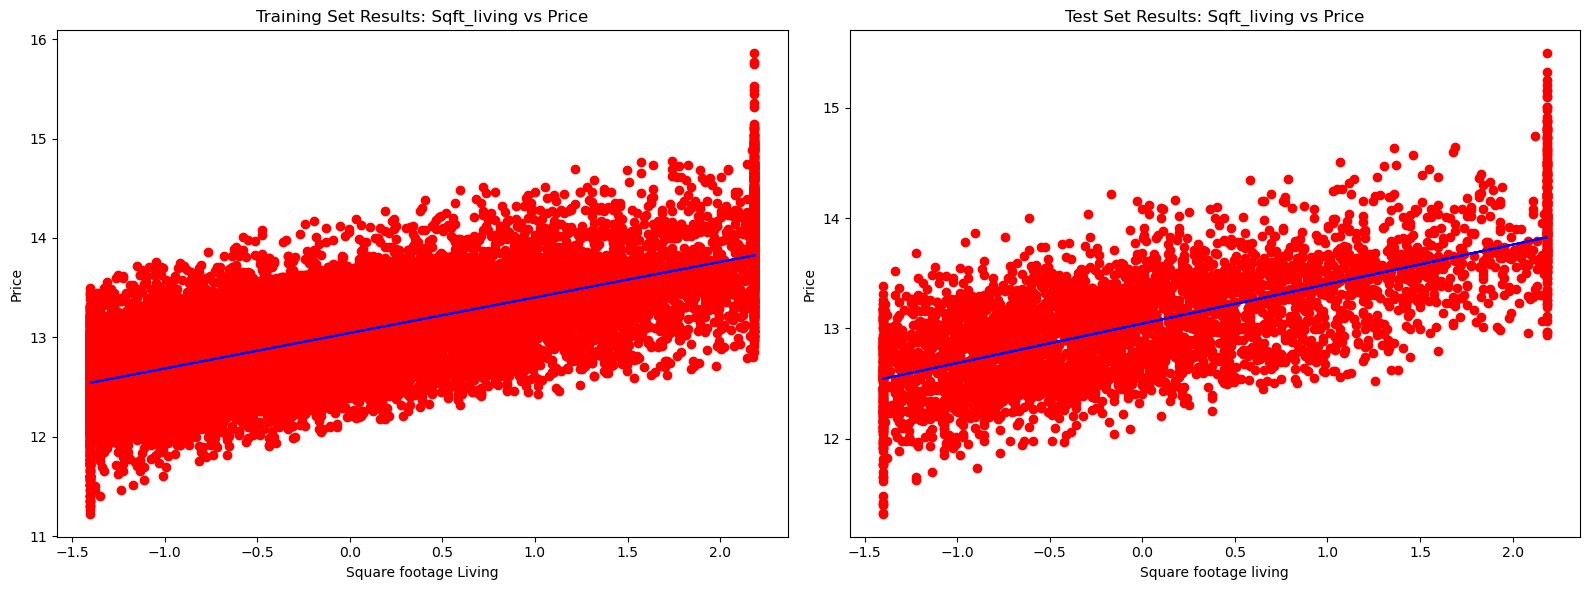

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_one_train_scaled = scaler.fit_transform(X_train)
X_one_test_scaled = scaler.transform(X_test) # to avoid data leakage

model = LinearRegression()
model.fit(X_one_train_scaled, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_one_test_scaled)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_one_test_scaled)))


fig = plt.figure(figsize = (16, 6))

# Visualising test training set results
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_one_train_scaled, y_train, color ='red')
ax1.plot(X_one_train_scaled, model.predict(X_one_train_scaled), color = 'blue')
ax1.set_xlabel('Square footage Living')
ax1.set_ylabel('Price')
plt.title('Training Set Results: Sqft_living vs Price');

# Visualising test results
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X_one_test_scaled, y_test, color='red')
ax2.plot(X_one_test_scaled, model.predict(X_one_test_scaled), color ='blue')
ax2.set_xlabel('Square footage living')
ax2.set_ylabel('Price')
plt.title('Test Set Results: Sqft_living vs Price');

plt.tight_layout()
plt.show()

Our model is learning well with this feature, as we can see similar slope in both training and test data set. This isnt surprising as we know both features are correlated

What happens if we trained blindly(in the sense that we didn't have an idea of their correlation rate) let's try with number of bedroom 

Coefficients:  [0.00023499 0.19878372]
Intercept:  11.043212328545163
Mean Squared error: 0.12
Coefficient of determination: 0.56


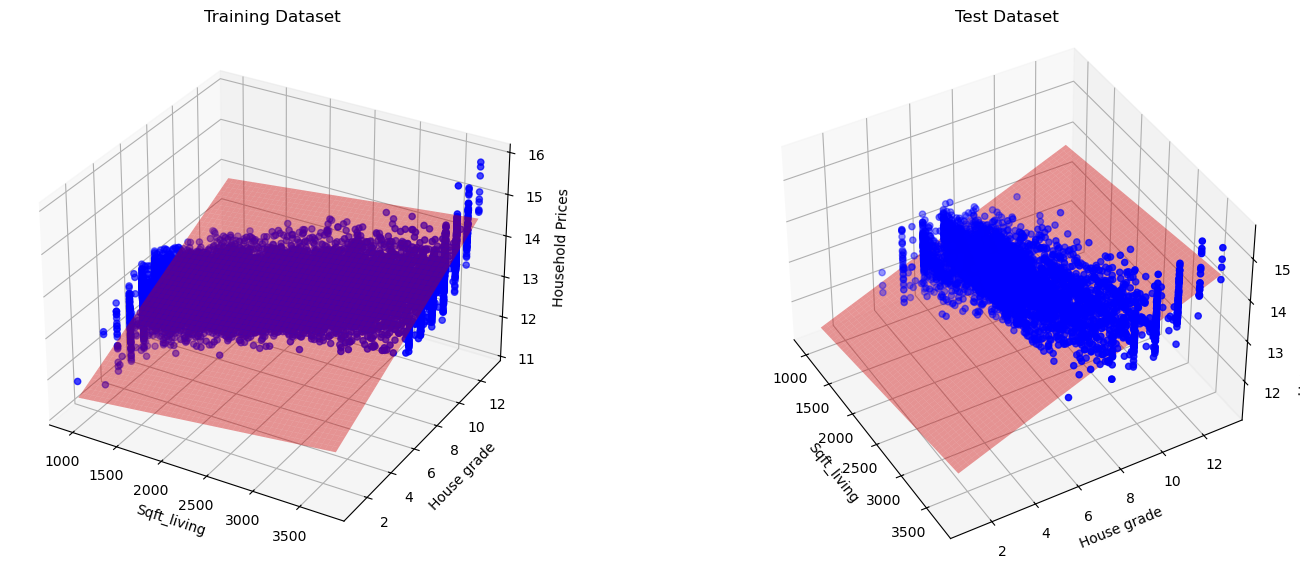

In [19]:
# Feature selection using 2 highly correlated values{sqftliving and grade}
X_two= X.iloc[:, [2, 8]].values

X_train, X_test, y_train, y_test = train_test_split(X_two, y, test_size =0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

# Creating meshgrid based on actal feature ranges
sqft_range = np.linspace(X_two[:, 0].min(), X_two[:, 0].max(), 50)
grade_range = np.linspace(X_two[:, 1].min(), X_two[:, 1].max(), 50)
S, G = np.meshgrid(sqft_range, grade_range)

#predict prices over the grid
Z = model.coef_[0] * S + model.coef_[1] * G + model.intercept_

# Visualising both training and test data set:
fig = plt.figure(figsize=(16, 6))

#subplot 1: Training data
ax1 = fig.add_subplot(1, 2, 1, projection ='3d')
ax1.scatter(X_train[:,0], X_train[:,1], y_train, color ='blue')
ax1.plot_surface(S, G, Z, alpha=0.4, color='red')
ax2.azim = -30
ax2.dist = -10
ax2.elev = 40
ax1.set_title('Training Dataset')
ax1.set_xlabel('Sqft_living')
ax1.set_ylabel('House grade')
ax1.set_zlabel('Household Prices')

# Visualise test data set results:
ax2 = fig.add_subplot(1, 2, 2, projection ='3d')
ax2.scatter(X_test[:,0], X_test[:,1], y_test, color ='blue')
ax2.plot_surface(S, G, Z, alpha=0.4, color='red')
ax2.azim = -30
ax2.dist = -10
ax2.elev = 40
ax2.set_title('Test Dataset')
ax2.set_xlabel('Sqft_living')
ax2.set_ylabel('House grade')
ax2.set_zlabel('Household Prices')

fig.tight_layout(pad=2.0)
plt.show()

In [20]:
# training with all dataset 14 features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test) # to avoid data leakage

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

# Note: Scalling our data or not doesn't improve the r2 score

Coefficients:  [-2.05291116e-02  7.69006844e-02  2.11659444e-04 -2.85049157e-07
  5.05586166e-02  3.85440935e-01  6.86604436e-02  6.25797714e-02
  1.84708817e-01 -7.27480398e-06 -3.59699780e-03  2.74861502e-05
  1.34643714e+00  5.37158003e-02]
Intercept:  -39.58285623829496
Mean Squared error: 0.07
Coefficient of determination: 0.76


In [21]:
for col, coef in zip(X.columns, model.coef_):
    print(f"{col:20} {coef: .2f}")

bedrooms             -0.02
bathrooms             0.08
sqft_living           0.00
sqft_lot             -0.00
floors                0.05
waterfront            0.39
view                  0.07
condition             0.06
grade                 0.18
sqft_basement        -0.00
yr_built             -0.00
yr_renovated          0.00
lat                   1.35
long                  0.05


In [22]:
y_pred = model.predict(X_test)

#### Feature selection using RFE

In [23]:
from sklearn.feature_selection import RFE

# I want to see the top 10 features

rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(X, y)

# Get selected features
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

selected_features

,Feature,Selected,Ranking
1,bathrooms,True,1
5,waterfront,True,1
6,view,True,1
7,condition,True,1
8,grade,True,1
12,lat,True,1
13,long,False,2
0,bedrooms,False,3
4,floors,False,4
10,yr_built,False,5


In [24]:
selected_features = ['bathrooms', 'waterfront', 'view', 'condition', 'grade', 'lat']

X_rfe = X[selected_features]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

Coefficients:  [0.12702266 0.38951677 0.10137196 0.10936199 0.23094239 1.46922127]
Intercept:  -59.26685641118905
Mean Squared error: 0.08
Coefficient of determination: 0.71


In [25]:
for col, coef in zip(X_rfe.columns, model.coef_):
    print(f"{col:20} {coef: .2f}")

bathrooms             0.13
waterfront            0.39
view                  0.10
condition             0.11
grade                 0.23
lat                   1.47


In [26]:
# Calculating percentage effect for all cooefficients as price was log trainsformed
# model.coef_ holds  coefficients
coefs = model.coef_
features = X_rfe.columns

pct_change = (np.exp(coefs) - 1) * 100

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Approx_%_Change': pct_change
}).sort_values(by='Approx_%_Change', ascending=False)

coef_df['Approx_%_Change'] = coef_df['Approx_%_Change'].apply(
    lambda x: f"+{x:.1f}%" if x > 0 else f"{x:.1f}%"
)

# Step 5: Sort by effect strength (largest positive first)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Step 6: Display results
print(coef_df.to_string(index=False))

   Feature  Coefficient Approx_%_Change
       lat     1.469221         +334.6%
waterfront     0.389517          +47.6%
     grade     0.230942          +26.0%
 bathrooms     0.127023          +13.5%
 condition     0.109362          +11.6%
      view     0.101372          +10.7%


#### The RFE model offers a more insightful analysis as it focuses on the strongest predictors of our target variables

#### Location has the largest impact on price, and our model predicts a 335% increase in price for houses located in certain zones. Homes with waterfront are about 48% more expensive than those without this feature. An increase in house grade also leads to a 26% increase in house price. An additional bathroom in the house leads to about a 14% increase in price, the house condition increases price by about 12% while the view also increases price by about 11%. 

